In [22]:
import pandas as pd
import numpy as np

story = pd.read_csv('nosleep_data.csv')

In [23]:
list(story.columns)

['Unnamed: 0',
 '_reddit',
 'approved_at_utc',
 'subreddit',
 'selftext',
 'author_fullname',
 'saved',
 'mod_reason_title',
 'gilded',
 'clicked',
 'title',
 'link_flair_richtext',
 'subreddit_name_prefixed',
 'hidden',
 'pwls',
 'link_flair_css_class',
 'downs',
 'thumbnail_height',
 'hide_score',
 'name',
 'quarantine',
 'link_flair_text_color',
 'upvote_ratio',
 'author_flair_background_color',
 'subreddit_type',
 'ups',
 'total_awards_received',
 'media_embed',
 'thumbnail_width',
 'author_flair_template_id',
 'is_original_content',
 'user_reports',
 'secure_media',
 'is_reddit_media_domain',
 'is_meta',
 'category',
 'secure_media_embed',
 'link_flair_text',
 'can_mod_post',
 'score',
 'approved_by',
 'author_premium',
 'thumbnail',
 'edited',
 'author_flair_css_class',
 'author_flair_richtext',
 'gildings',
 'content_categories',
 'is_self',
 'mod_note',
 'created',
 'link_flair_type',
 'wls',
 'removed_by_category',
 'banned_by',
 'author_flair_type',
 'domain',
 'allow_live_co

## Dropping duplicates and rows without stories

In [24]:
story['selftext'].value_counts()
# Dont want removed posts and duplicate posted stories

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [25]:
story.drop_duplicates(subset=['selftext'], keep=False,inplace=True)

In [26]:
story['selftext'].value_counts()

(EDIT: I dont know why but half of the story is gone and I dont know why, Im fixing it)\n\nAs you can see at the title, I work as a space freighter pilot, I can´t tell you the exact name of the company because the would quite probably sue me for " Spread fallacies and tarnish their perfect image " Also, I don't want to give them free Externet advertising. Anyway, my work consists mainly in sitting on a mildly comfy chair, look an the radar screen and guide the ship in case I have to avoid a collision, in which case I simply move the ship to avoid space debries (Ice, Rock, Junk) so my work is pretty easy and very well paid if you ask me, however the flights are almost a year long so it´s also insanely tedious.\n\nThe "Incident" happened when I was getting ready to dodge the asteroid belt , I adjusted the course and went to my cabin to watch something on the Externet, fortunately the array of anntena buoys some companies have dispatched give most of the ships on the solar system perfect 

In [27]:
story.shape

(4126, 113)

## Dropping columns that dont relate to my task

In [28]:
story.drop(labels=['Unnamed: 0',
 '_reddit',
 'approved_at_utc'], axis=1, inplace=True)

In [29]:
story['author_fullname'].value_counts()

t2_3jp2hzr9    41
t2_3m27edt4    37
t2_55ayqf02    31
t2_4wglcouj    28
t2_14qvmh      27
               ..
t2_10r95c       1
t2_4stdn7oc     1
t2_ohyjd        1
t2_43pddhvo     1
t2_ijrbw        1
Name: author_fullname, Length: 2195, dtype: int64

In [30]:
story['gilded'].value_counts()

0    3918
1     160
2      35
3       9
4       3
5       1
Name: gilded, dtype: int64

In [31]:
story.drop(labels= ['saved'], axis=1,inplace=True)

In [32]:
story.drop(labels= ['mod_reason_title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden'], axis=1,inplace=True)

In [33]:
bool_columns = list(story.select_dtypes(include='bool').columns)

In [34]:
story.drop(labels=bool_columns, axis=1, inplace=True)

In [35]:
story.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1 to 9999
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   subreddit                      4126 non-null   object 
 1   selftext                       4126 non-null   object 
 2   author_fullname                4091 non-null   object 
 3   gilded                         4126 non-null   int64  
 4   title                          4126 non-null   object 
 5   pwls                           4126 non-null   int64  
 6   link_flair_css_class           1738 non-null   object 
 7   downs                          4126 non-null   int64  
 8   thumbnail_height               0 non-null      float64
 9   name                           4126 non-null   object 
 10  link_flair_text_color          4126 non-null   object 
 11  upvote_ratio                   4126 non-null   float64
 12  author_flair_background_color  0 non-null      f

## Checking the upvote distribution for evaluation when posted to Reddit

In [53]:
storyups = story[story['ups'] < 100]

Text(0.5, 1.0, 'Distribution of upvotes (under 100)')

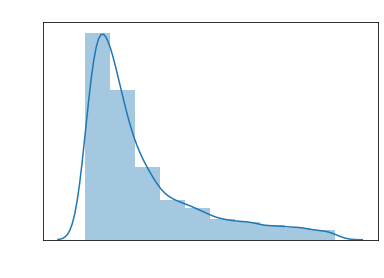

In [57]:
import matplotlib as mpl

mpl.rcParams['text.color'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
sns.distplot(storyups['ups'], bins = 10)
plt.title('Distribution of upvotes (under 100)')


In [16]:
num_columns = story.select_dtypes(include=['int64','float64']).count()

In [17]:
num_drop = list(num_columns[num_columns==0].index)

In [18]:
story.drop(labels=num_drop, axis=1, inplace=True)

In [19]:
story.select_dtypes(include=['int64','float64'])

,gilded,pwls,downs,upvote_ratio,ups,total_awards_received,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts,comment_limit
1,0,6,0,0.67,1,0,1,1.589925e+09,6,0,14015505,1.589896e+09,0,2048
2,0,6,0,0.50,0,0,0,1.589925e+09,6,1,14015505,1.589896e+09,0,2048
6,0,6,0,0.90,8,0,8,1.589922e+09,6,1,14015505,1.589893e+09,0,2048
7,0,6,0,0.88,6,0,6,1.589921e+09,6,0,14015505,1.589892e+09,0,2048
8,0,6,0,0.93,12,1,12,1.589921e+09,6,3,14015505,1.589892e+09,0,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,6,0,0.90,14,0,14,1.584051e+09,6,2,14015508,1.584022e+09,0,2048
9993,0,6,0,0.90,24,0,24,1.584050e+09,6,2,14015508,1.584021e+09,0,2048
9996,1,6,0,0.98,1057,2,1057,1.584046e+09,6,32,14015508,1.584017e+09,3,2048
9998,0,6,0,0.97,31,0,31,1.584046e+09,6,3,14015508,1.584017e+09,0,2048


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

display(story)

,subreddit,selftext,author_fullname,gilded,title,pwls,link_flair_css_class,downs,name,link_flair_text_color,...,subreddit_subscribers,created_utc,num_crossposts,comment_limit,comment_sort,_comments_by_id,link_flair_template_id,post_hint,preview,author_cakeday
1,nosleep,"Molly, if you’re reading this, I’m so sorry ab...",t2_6fwlnyxi,0,Hell's Asshole,6,NaN,0,t3_gmozxx,dark,...,14015505,1.589896e+09,0,2048,confidence,{},NaN,NaN,NaN,NaN
2,nosleep,I live in a suburb outside a big city with my ...,t2_3307ht37,0,"If anyone knows what’s happening, you have to ...",6,flair-series,0,t3_gmoz3z,dark,...,14015505,1.589896e+09,0,2048,confidence,{},8beec82a-dcc1-11e8-a09f-0e09eae1a1c0,NaN,NaN,NaN
6,nosleep,\n\nI’ve had separation anxiety ever since I...,t2_4oct8jcu,0,How I lost my eyes,6,NaN,0,t3_gmnz6e,dark,...,14015505,1.589893e+09,0,2048,confidence,{},NaN,NaN,NaN,NaN
7,nosleep,This a true story that happened last year. I o...,t2_6ipspeqg,0,Kid saw something in the bush,6,NaN,0,t3_gmnvj3,dark,...,14015505,1.589892e+09,0,2048,confidence,{},NaN,NaN,NaN,NaN
8,nosleep,I couldn’t sleep.\n\nThe tension was too much....,t2_4n0bgr3t,0,There's a man standing across the street from ...,6,NaN,0,t3_gmntnt,dark,...,14015505,1.589892e+09,0,2048,confidence,{},NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,nosleep,There is nothing much to do in this city.\n\nI...,t2_5id5v6d0,0,They Might Be Watching: Part I,6,flair-series,0,t3_fhgtnk,dark,...,14015508,1.584022e+09,0,2048,confidence,{},NaN,NaN,NaN,NaN
9993,nosleep,There is a man upon the stairwell. He is not e...,t2_4fvuyv4d,0,The Last Words of Little Children,6,NaN,0,t3_fhgp83,dark,...,14015508,1.584021e+09,0,2048,confidence,{},NaN,NaN,NaN,NaN
9996,nosleep,Do you ever just sit and watch your sleeping d...,t2_20gz4yg3,1,My dog dreams about my death.,6,NaN,0,t3_fhfua2,dark,...,14015508,1.584017e+09,3,2048,confidence,{},NaN,self,{'images': [{'source': {'url': 'https://extern...,NaN
9998,nosleep,[(Part 1)](https://www.reddit.com/r/nosleep/co...,t2_2jhmpsgt,0,We Were Superheroes (Part 2),6,flair-series,0,t3_fhfp35,dark,...,14015508,1.584017e+09,0,2048,confidence,{},8beec82a-dcc1-11e8-a09f-0e09eae1a1c0,NaN,NaN,NaN


In [20]:
['pwls','wls','downs','ups']

['pwls', 'wls', 'downs', 'ups']

In [21]:
story['total_awards_received'].value_counts()

0     3660
1      263
2       81
3       41
4       31
5       16
6       10
7        8
9        4
8        4
10       3
19       1
15       1
11       1
28       1
12       1
Name: total_awards_received, dtype: int64

In [22]:
story[story['total_awards_received'] == 28].select_dtypes(include=['object'])
# checked, this story really does have 28 awards
# will just be using the total awards recieved instead of the other columns like gilded

,subreddit,selftext,author_fullname,title,link_flair_css_class,name,link_flair_text_color,subreddit_type,media_embed,user_reports,...,author_flair_text_color,permalink,parent_whitelist_status,url,comment_sort,_comments_by_id,link_flair_template_id,post_hint,preview,author_cakeday
9414,nosleep,It was the advertisement’s outright simplicity...,t2_fr369,They paid me $5000 to go through hell,NaN,t3_fjma9t,dark,public,{},[],...,NaN,/r/nosleep/comments/fjma9t/they_paid_me_5000_t...,all_ads,https://www.reddit.com/r/nosleep/comments/fjma...,confidence,{},NaN,self,{'images': [{'source': {'url': 'https://extern...,NaN


In [23]:
story.select_dtypes(include=['int64','float64'])

,gilded,pwls,downs,upvote_ratio,ups,total_awards_received,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts,comment_limit
1,0,6,0,0.67,1,0,1,1.589925e+09,6,0,14015505,1.589896e+09,0,2048
2,0,6,0,0.50,0,0,0,1.589925e+09,6,1,14015505,1.589896e+09,0,2048
6,0,6,0,0.90,8,0,8,1.589922e+09,6,1,14015505,1.589893e+09,0,2048
7,0,6,0,0.88,6,0,6,1.589921e+09,6,0,14015505,1.589892e+09,0,2048
8,0,6,0,0.93,12,1,12,1.589921e+09,6,3,14015505,1.589892e+09,0,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,6,0,0.90,14,0,14,1.584051e+09,6,2,14015508,1.584022e+09,0,2048
9993,0,6,0,0.90,24,0,24,1.584050e+09,6,2,14015508,1.584021e+09,0,2048
9996,1,6,0,0.98,1057,2,1057,1.584046e+09,6,32,14015508,1.584017e+09,3,2048
9998,0,6,0,0.97,31,0,31,1.584046e+09,6,3,14015508,1.584017e+09,0,2048


In [24]:
d = ['pwls','wls','downs','ups', 'score', 'created', 'num_comments', 'subreddit_subscribers', 'created_utc','num_crossposts',
'comment_limit']

In [25]:
story.drop(labels=d, axis= 1, inplace=True)

In [26]:
story.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1 to 9999
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   subreddit                4126 non-null   object 
 1   selftext                 4126 non-null   object 
 2   author_fullname          4091 non-null   object 
 3   gilded                   4126 non-null   int64  
 4   title                    4126 non-null   object 
 5   link_flair_css_class     1738 non-null   object 
 6   name                     4126 non-null   object 
 7   link_flair_text_color    4126 non-null   object 
 8   upvote_ratio             4126 non-null   float64
 9   subreddit_type           4126 non-null   object 
 10  total_awards_received    4126 non-null   int64  
 11  media_embed              4126 non-null   object 
 12  user_reports             4126 non-null   object 
 13  secure_media_embed       4126 non-null   object 
 14  link_flair_text         

In [27]:
story_obj = story.select_dtypes(include=['object'])
story_obj.head()

,subreddit,selftext,author_fullname,title,link_flair_css_class,name,link_flair_text_color,subreddit_type,media_embed,user_reports,...,author_flair_text_color,permalink,parent_whitelist_status,url,comment_sort,_comments_by_id,link_flair_template_id,post_hint,preview,author_cakeday
1,nosleep,"Molly, if you’re reading this, I’m so sorry ab...",t2_6fwlnyxi,Hell's Asshole,NaN,t3_gmozxx,dark,public,{},[],...,NaN,/r/nosleep/comments/gmozxx/hells_asshole/,all_ads,https://www.reddit.com/r/nosleep/comments/gmoz...,confidence,{},NaN,NaN,NaN,NaN
2,nosleep,I live in a suburb outside a big city with my ...,t2_3307ht37,"If anyone knows what’s happening, you have to ...",flair-series,t3_gmoz3z,dark,public,{},[],...,NaN,/r/nosleep/comments/gmoz3z/if_anyone_knows_wha...,all_ads,https://www.reddit.com/r/nosleep/comments/gmoz...,confidence,{},8beec82a-dcc1-11e8-a09f-0e09eae1a1c0,NaN,NaN,NaN
6,nosleep,\n\nI’ve had separation anxiety ever since I...,t2_4oct8jcu,How I lost my eyes,NaN,t3_gmnz6e,dark,public,{},[],...,NaN,/r/nosleep/comments/gmnz6e/how_i_lost_my_eyes/,all_ads,https://www.reddit.com/r/nosleep/comments/gmnz...,confidence,{},NaN,NaN,NaN,NaN
7,nosleep,This a true story that happened last year. I o...,t2_6ipspeqg,Kid saw something in the bush,NaN,t3_gmnvj3,dark,public,{},[],...,NaN,/r/nosleep/comments/gmnvj3/kid_saw_something_i...,all_ads,https://www.reddit.com/r/nosleep/comments/gmnv...,confidence,{},NaN,NaN,NaN,NaN
8,nosleep,I couldn’t sleep.\n\nThe tension was too much....,t2_4n0bgr3t,There's a man standing across the street from ...,NaN,t3_gmntnt,dark,public,{},[],...,NaN,/r/nosleep/comments/gmntnt/theres_a_man_standi...,all_ads,https://www.reddit.com/r/nosleep/comments/gmnt...,confidence,{},NaN,NaN,NaN,NaN


In [28]:
story_obj['link_flair_css_class'].value_counts()

flair-series     1582
flair-trigger     156
Name: link_flair_css_class, dtype: int64

In [29]:
story_obj.shape
# there are a lot of stories as a series


(4126, 45)

# Add series together?

In [30]:
story_obj.columns[2:]

Index(['author_fullname', 'title', 'link_flair_css_class', 'name',
       'link_flair_text_color', 'subreddit_type', 'media_embed',
       'user_reports', 'secure_media_embed', 'link_flair_text',
       'author_premium', 'thumbnail', 'edited', 'author_flair_css_class',
       'author_flair_richtext', 'gildings', 'content_categories',
       'link_flair_type', 'removed_by_category', 'author_flair_type', 'domain',
       'selftext_html', 'all_awardings', 'awarders', 'author_flair_text',
       'treatment_tags', 'distinguished', 'subreddit_id', 'id', 'author',
       'whitelist_status', 'mod_reports', 'author_patreon_flair',
       'author_flair_text_color', 'permalink', 'parent_whitelist_status',
       'url', 'comment_sort', '_comments_by_id', 'link_flair_template_id',
       'post_hint', 'preview', 'author_cakeday'],
      dtype='object')

In [31]:
# Checking the distribution in each of the columns
for i in story_obj.columns[2:]:
    print (story_obj[i].value_counts())

t2_3jp2hzr9    41
t2_3m27edt4    37
t2_55ayqf02    31
t2_4wglcouj    28
t2_14qvmh      27
               ..
t2_zctlc        1
t2_5z3sca96     1
t2_6cw1rnzx     1
t2_55pibznx     1
t2_zxxv1        1
Name: author_fullname, Length: 2195, dtype: int64
There are some monsters out there that are better off not being known                                                                                      3
The Thing in Saunders Asylum                                                                                                                               2
My stepmother trapped me inside a music box when I was 9. For the first time in over 20 years, I’ve found a way to make contact with the outside world.    2
The Frequent                                                                                                                                               2
The Woods                                                                                                                   

all_ads    4126
Name: parent_whitelist_status, dtype: int64
https://www.reddit.com/r/nosleep/comments/fswe3n/i_used_to_not_be_afraid_of_heights_that_all/          1
https://www.reddit.com/r/nosleep/comments/ggav3h/theres_someone_in_that_hole_in_the_ground_part_2/     1
https://www.reddit.com/r/nosleep/comments/gkl55f/the_shadow_man/                                       1
https://www.reddit.com/r/nosleep/comments/fxh4x6/my_school_has_a_dark_past_and_its_creeping_back/      1
https://www.reddit.com/r/nosleep/comments/gld7x3/i_bought_groceries_for_my_local_pizza_shop_during/    1
                                                                                                      ..
https://www.reddit.com/r/nosleep/comments/fty9jo/better_than_one/                                      1
https://www.reddit.com/r/nosleep/comments/fm2fl6/the_ice_cream_truck_in_my_neighborhood_sells_moon/    1
https://www.reddit.com/r/nosleep/comments/ftrezs/there_was_a_thing_in_our_cabin/                    

In [32]:
story.drop(labels = story_obj.columns[4:], axis=1, inplace=True)

In [33]:
#Dropped this at first, was going to add it back into the training data once I had the model working
story.drop(labels= ['author_fullname'], axis=1, inplace=True)

In [34]:
story.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subreddit              4126 non-null   object 
 1   selftext               4126 non-null   object 
 2   gilded                 4126 non-null   int64  
 3   title                  4126 non-null   object 
 4   upvote_ratio           4126 non-null   float64
 5   total_awards_received  4126 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 225.6+ KB


In [35]:
story.drop(labels=['gilded'], axis= 1,inplace=True)

In [36]:
story

,subreddit,selftext,title,upvote_ratio,total_awards_received
1,nosleep,"Molly, if you’re reading this, I’m so sorry ab...",Hell's Asshole,0.67,0
2,nosleep,I live in a suburb outside a big city with my ...,"If anyone knows what’s happening, you have to ...",0.50,0
6,nosleep,\n\nI’ve had separation anxiety ever since I...,How I lost my eyes,0.90,0
7,nosleep,This a true story that happened last year. I o...,Kid saw something in the bush,0.88,0
8,nosleep,I couldn’t sleep.\n\nThe tension was too much....,There's a man standing across the street from ...,0.93,1
...,...,...,...,...,...
9991,nosleep,There is nothing much to do in this city.\n\nI...,They Might Be Watching: Part I,0.90,0
9993,nosleep,There is a man upon the stairwell. He is not e...,The Last Words of Little Children,0.90,0
9996,nosleep,Do you ever just sit and watch your sleeping d...,My dog dreams about my death.,0.98,2
9998,nosleep,[(Part 1)](https://www.reddit.com/r/nosleep/co...,We Were Superheroes (Part 2),0.97,0


In [49]:
story = story.rename(columns = {'subreddit': 'domain', 'selftext':'text', 'title':'title'}).drop(['upvote_ratio','total_awards_received'], axis=1)

In [85]:
# Doing a little cheating here, these are the column names required for the model data loader.
story['summary'] = ''
story['split'] = 'train'
story['publish_date'] = '04-04-2016'
story['authors'] = ""
story['status'] = 'success'
story['url'] = ''
story['warc_date'] = None

In [86]:
story

,domain,text,title,summary,split,publish_date,authors,status,url,warc_date
1,nosleep,"Molly, if you’re reading this, I’m so sorry ab...",Hell's Asshole,,train,04-04-2016,,success,,None
2,nosleep,I live in a suburb outside a big city with my ...,"If anyone knows what’s happening, you have to ...",,train,04-04-2016,,success,,None
6,nosleep,\n\nI’ve had separation anxiety ever since I...,How I lost my eyes,,train,04-04-2016,,success,,None
7,nosleep,This a true story that happened last year. I o...,Kid saw something in the bush,,train,04-04-2016,,success,,None
8,nosleep,I couldn’t sleep.\n\nThe tension was too much....,There's a man standing across the street from ...,,train,04-04-2016,,success,,None
...,...,...,...,...,...,...,...,...,...,...
9991,nosleep,There is nothing much to do in this city.\n\nI...,They Might Be Watching: Part I,,train,04-04-2016,,success,,None
9993,nosleep,There is a man upon the stairwell. He is not e...,The Last Words of Little Children,,train,04-04-2016,,success,,None
9996,nosleep,Do you ever just sit and watch your sleeping d...,My dog dreams about my death.,,train,04-04-2016,,success,,None
9998,nosleep,[(Part 1)](https://www.reddit.com/r/nosleep/co...,We Were Superheroes (Part 2),,train,04-04-2016,,success,,None


In [92]:
# The required format is a json file
story_form_jsonl = story.to_json('story_jsonl.json',orient='records', lines=True)